# Preprocessing Notes

I believe there are 2 crucial components to this experiment that are **more important** than type of Neural Network:
- collection of good data with various scenarios
- preporcesing of the images to remove unnecessary training burden

## Steps 

- Crop the images
- Apply mask to leave only essential data
- Grayscale (see "Conclusions and assumptions")
- Blur the image to remove pixelation and smooth the embankments
- POSSIBLY: Detect "Canny Edges"
- POSSIBLY: Use Hugh algorithm to connect dots (draw lines)
- POSSIBLY: throw out **everything** else except left/right lanes
- Scale down the images to 28x28 if possible
- Visually verify all kinds of landscapes 
    - if I (human) can tell immediately how to steer then I can teach Neural Network to do so, too.

In [1]:
data_dir = "../../../DATA/behavioral_cloning_data/"
image_final_width = 64

# Read CSV spreadsheet

In [2]:
import csv

import DataHelper
#print(DataHelper.__doc__)
from DataHelper import test_read_csv, read_csv
#print(read_csv.__doc__)

headers, data = read_csv(data_dir + "driving_log.csv")
print("headers \n", headers)
print("sample of data \n", data[3])

Using TensorFlow backend.


imported rows 8037
headers 
 ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
sample of data 
 ['IMG/center_2016_12_01_13_31_13_037.jpg'
 ' IMG/left_2016_12_01_13_31_13_037.jpg'
 ' IMG/right_2016_12_01_13_31_13_037.jpg' ' 0' ' 0' ' 0' ' 1.438419']


## Spot-check retrieved data

In [3]:
from DataHelper import get_speed_values, get_steering_values
from DataHelper import get_image_center_values

image_center_values = get_image_center_values(data)
print("center camera values", image_center_values[53]) 

speed_values = get_speed_values(data)
print("speed values", speed_values[53]) 

steering_values = get_steering_values(data)
print("steering values", steering_values[53]) 

center camera values IMG/center_2016_12_01_13_32_43_659.jpg
speed values 4.440864
steering values 0.05219137


# Steering value distribution

It appears, as expected that most of the driving is straight and the allowed values are from -1 to +1.

Most values are in the -0.25 to +0.25 range.

I would **err on the prudent side** and avoid the values above |0.25|.

min_value -0.9426954
max_value 1.0
spread 1.9426954
recommended number of classes 20


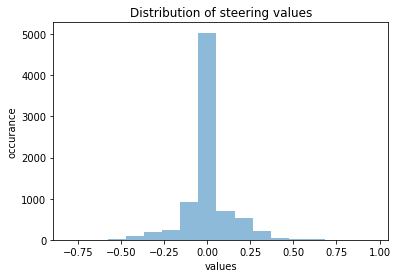

In [4]:
from DataHelper import plot_histogram

change_step=0.1 # test data changes
plot_histogram("steering values", steering_values, change_step)

# Speed value distribution

It appears, most of the driving is done at top speed of 30mph.

There is no sense to change speed in smaller increments than 1 mph.

min_value 0.5024896
max_value 30.70936
spread 30.2068704
recommended number of classes 31


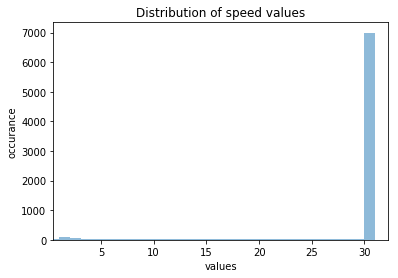

In [5]:
change_step=1 # test data changes
plot_histogram("speed values", speed_values, change_step)

# Select random data samples

In [6]:
# not random, sanity check
print(speed_values[3])
print(image_center_values[3])

1.438419
IMG/center_2016_12_01_13_31_13_037.jpg


sample image 16 ../../../DATA/behavioral_cloning_data/IMG/center_2016_12_01_13_31_14_398.jpg


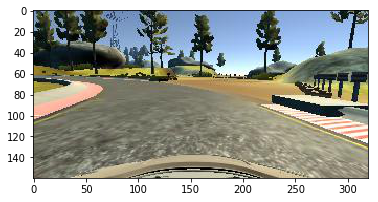

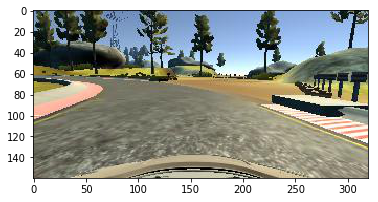

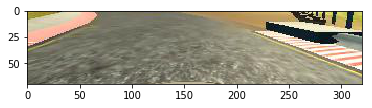

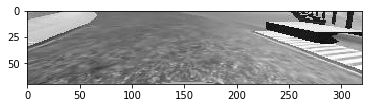

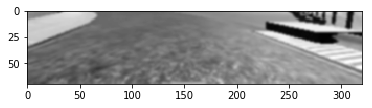

image before resizing (70, 320)


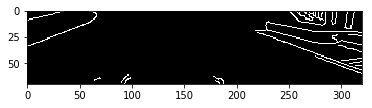

image after resizing (14, 64)


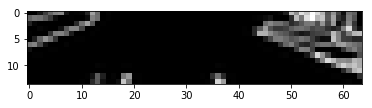

(14, 64)


In [7]:
#from numpy import array
import random
import matplotlib.pyplot as plt
from ImageHelper import preprocessing_pipline
from DataHelper import load_image

image_index = random.randrange(len(speed_values))
image_path = data_dir + image_center_values[image_index] # TODO rename to image_names_center_cam
print("sample image", image_index, image_path)
image = load_image(image_path)
plt.imshow(image)
plt.show()

image = preprocessing_pipline(image, final_size=image_final_width, should_plot=True)
print(image.shape)

# Convert ALL of the images and save them

In [9]:
def process_all(image_list, processed_images_dir, image_final_width=64):
    
    import scipy
    import scipy.misc
    from scipy.misc import imsave
    
    for image_index in range( len(image_list) ): # only first 5 items image_list[5]
        image_name = image_center_values[image_index]
        image_path = data_dir + image_name
        image = load_image(image_path)
        image_array = preprocessing_pipline(image, final_size=image_final_width, should_plot=False)
        imsave( processed_images_dir + image_name, image_array)
    return

processed_images_dir = data_dir + "processed_images_" + str(image_final_width) + "/"
print("make sure that this directory exists: ", processed_images_dir)

process_all(image_center_values, processed_images_dir, image_final_width)

make sure that this directory exists:  ../../../DATA/behavioral_cloning_data/processed_images_64/
